In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [53]:
# TODO
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.



Number of rows and columns in the dataframe:
(1025, 14)

Data types of features in the dataframe:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Summary statistics of numerical features:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.00

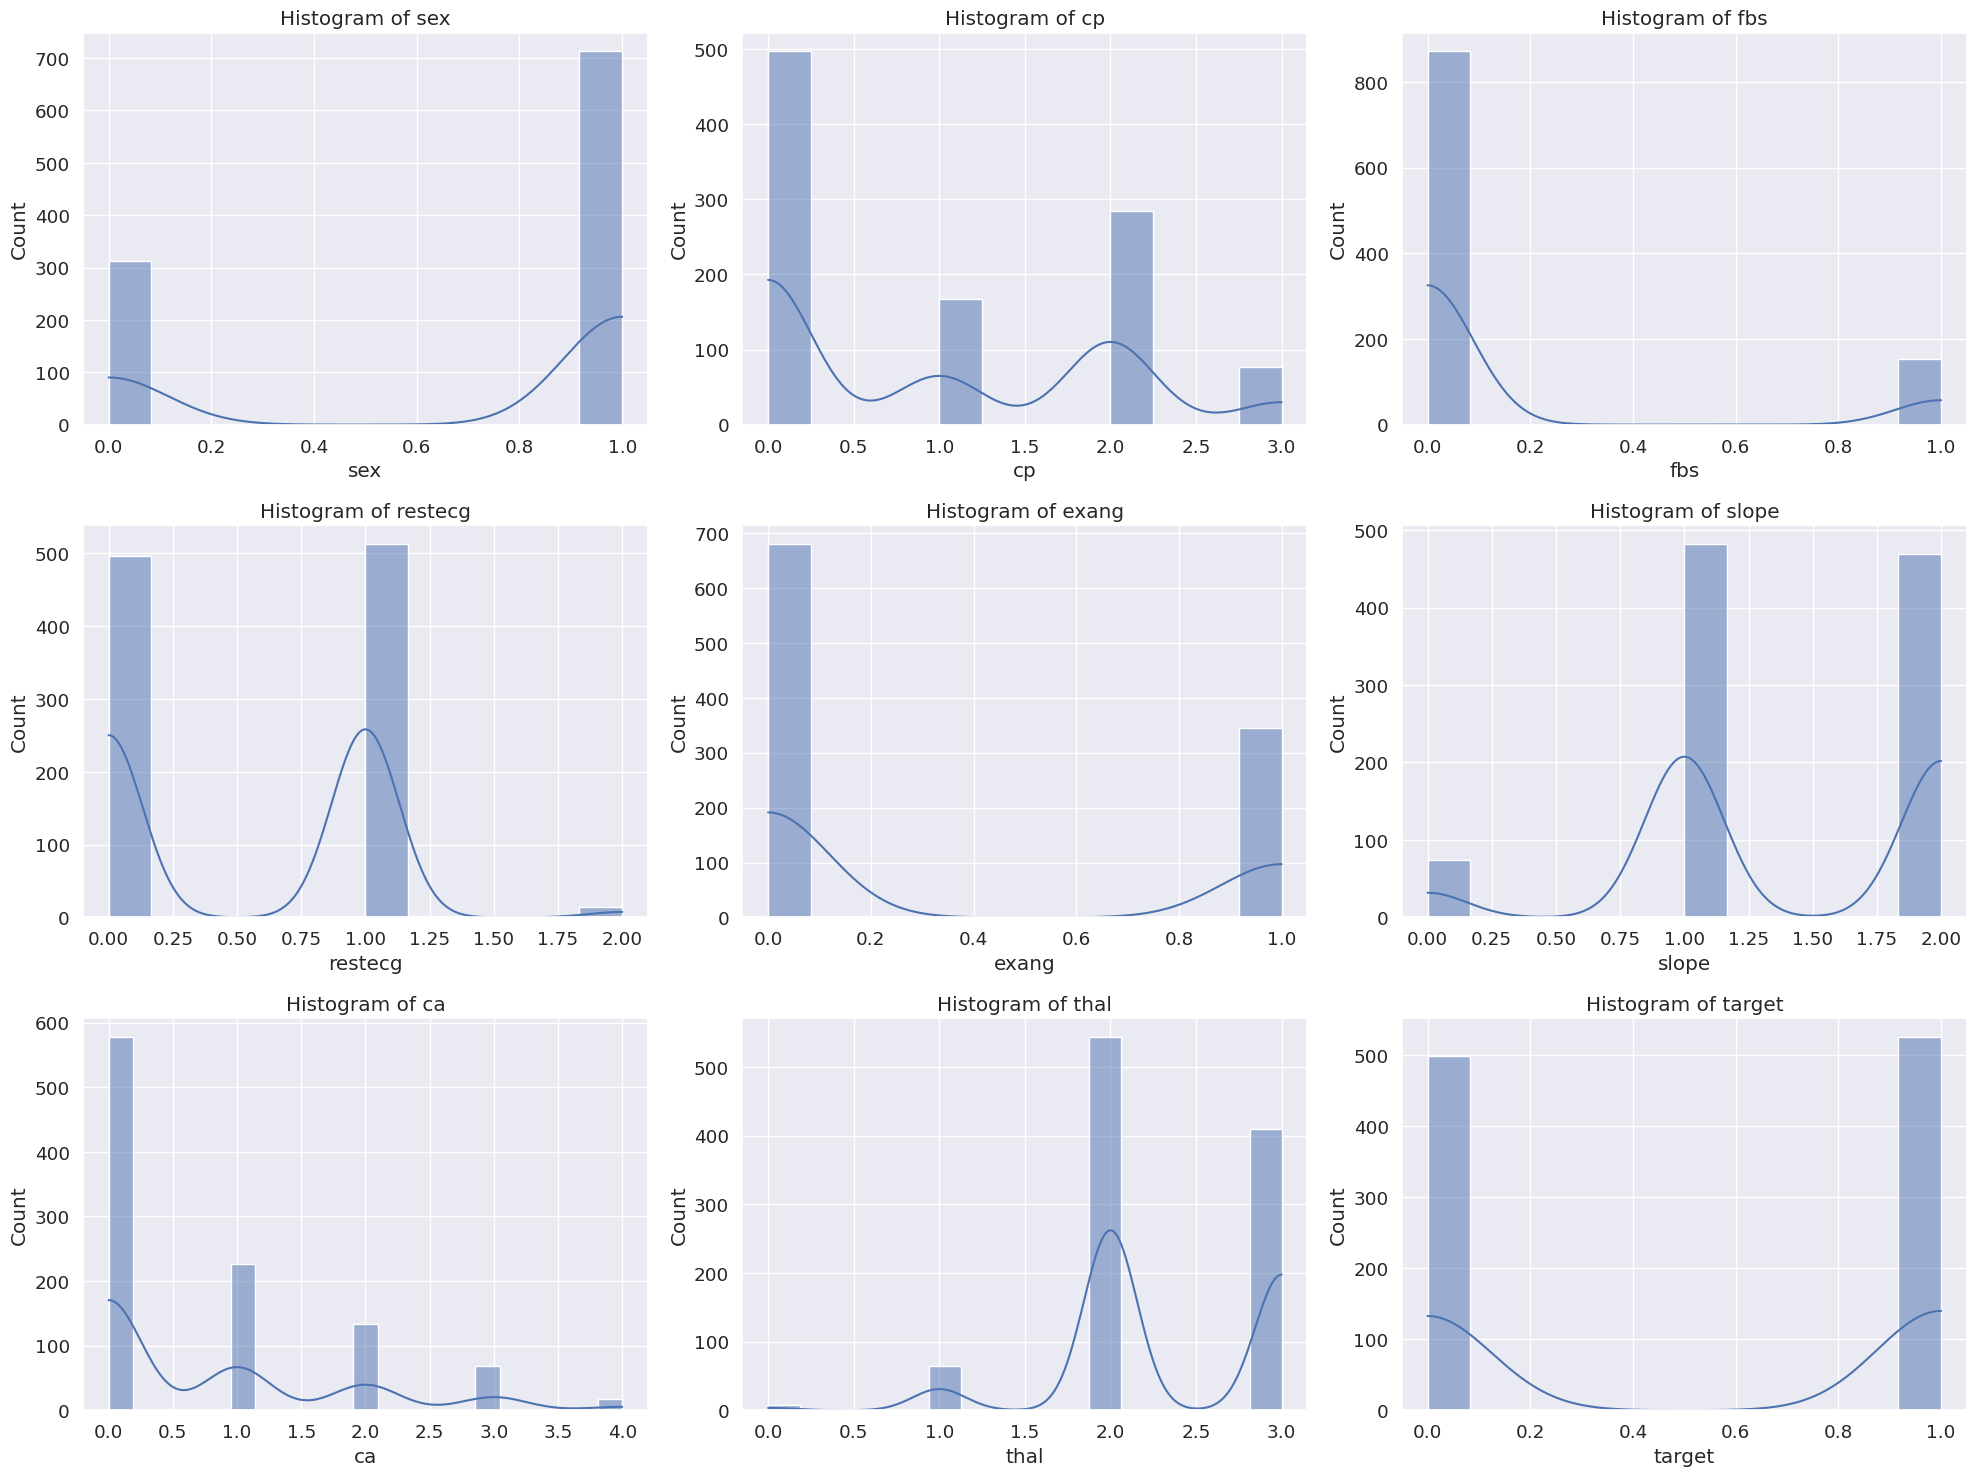

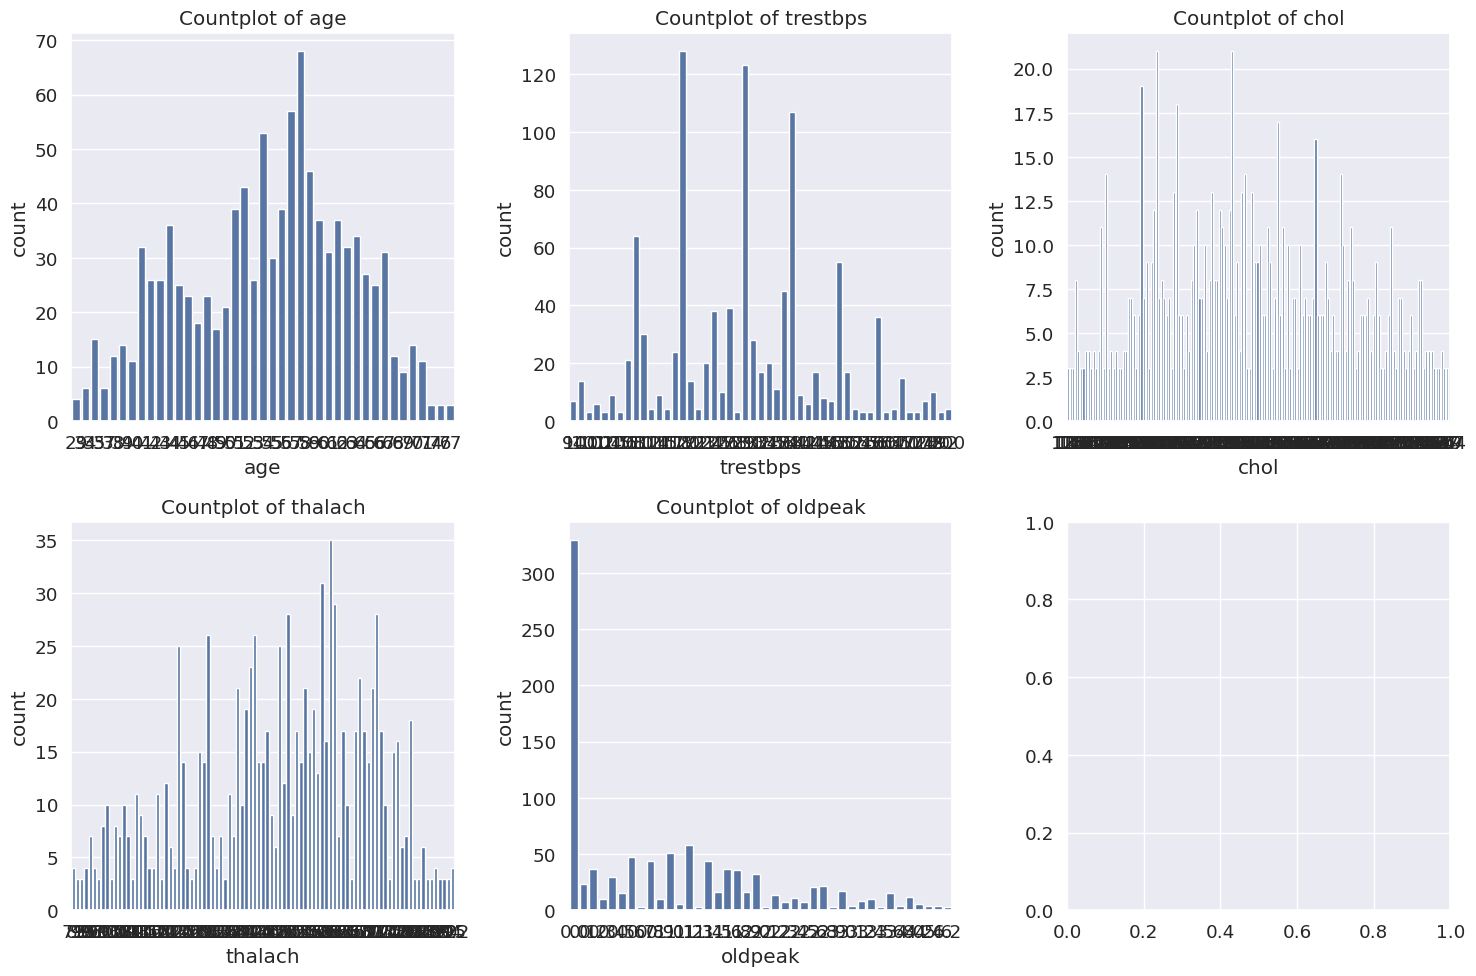

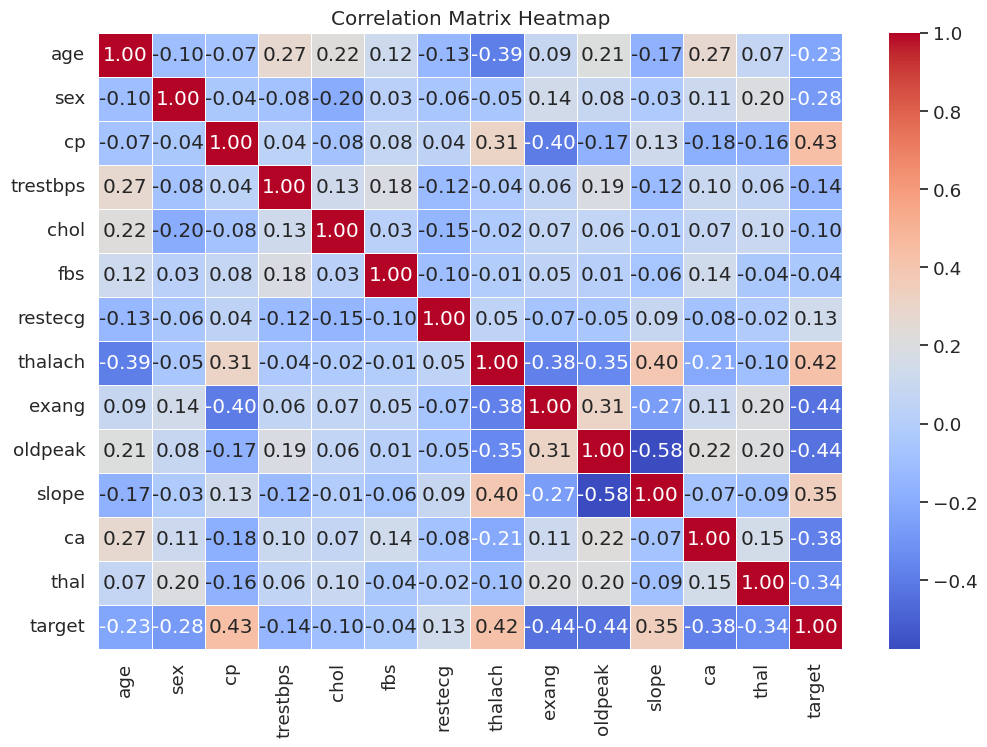

In [54]:
print("\nNumber of rows and columns in the dataframe:")
print(df.shape)

print("\nData types of features in the dataframe:")
print(df.dtypes)

print("\nSummary statistics of numerical features:")
print(df.describe())

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

feature_list = [f for f in df.columns]
continuous_features = [feature for feature in feature_list if len(df[feature].unique()) <= 25]
categorical_features = [feature for feature in feature_list if len(df[feature].unique()) > 25]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [55]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [56]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [57]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    learning_rate = 1
    Y = np.where(Y==0, -1, Y)
    epochs = 100
    w = np.zeros(X.shape[1])

    for _ in range(epochs):
        for i, x in enumerate(X):
            if Y[i] * np.dot(x, w) <= 0:
                w = w + learning_rate * Y[i] * x

    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [58]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    Y = np.where(Y==0, -1, Y)
    w = np.zeros(X.shape[1])
    learning_rate = 0.05
    epochs = 1000

    errors = []

    for _ in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if Y[i] * np.dot(x, w) <= 0:
                total_error += 1 - Y[i] * np.dot(x, w)
                w = w + learning_rate * Y[i] * x
        errors.append(total_error)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Total Loss in Each Epoch')
    plt.show()


    return w

In [59]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [60]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.full((X.shape[0], 1), -1)

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [61]:
from sklearn.model_selection import train_test_split # Note: TAs allowed this function of sklearn

# def train_test_split_custom(X, y, test_ratio=0.2):
'''
    Splits the dataset into train and test sets with the specified ratio.

    Parameters:
        X: Input features matrix (numpy array)
        y: Target labels vector (numpy array)
        test_ratio: Ratio of the test set size to the whole dataset (float)

    Returns:
        X_train: Training data samples
        X_val: Validation data samples
        y_train: Training labels
        y_val: Validation labels
'''

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


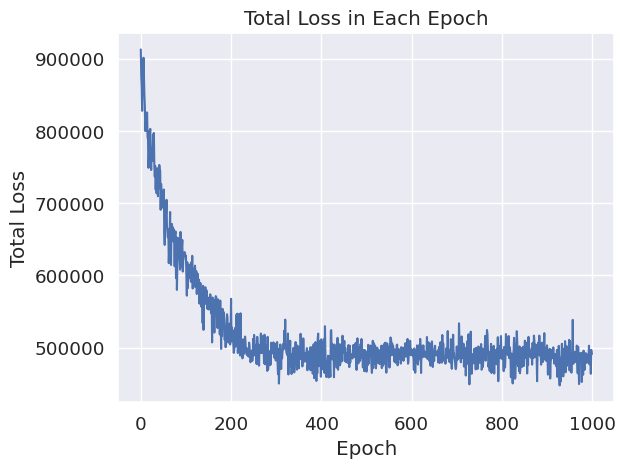

In [62]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [63]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    correct_count = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_count / total_samples

    return accuracy


Get the accuracy of your model using the function you implemented.

In [64]:
# TODO

predictions = np.dot(X_val, w)
predictions = np.sign([p for p in predictions])
y_val = np.where(y_val==0, -1, y_val)
print(accuracy_score(y_val, predictions))

0.8048780487804879


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [65]:

def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    # TODO: Populate the confusion matrix
    num_labels = len(labels)
    matrix = np.zeros((num_labels, num_labels), dtype=int)
    for act, pred in zip(actual, predicted):
        true_label_idx = labels.index(act)
        pred_label_idx = labels.index(pred)
        matrix[true_label_idx][pred_label_idx] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [66]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels, rotation=0)
    plt.title('Confusion Matrix')
    plt.show()

Now plot the confusion matrix for your model:

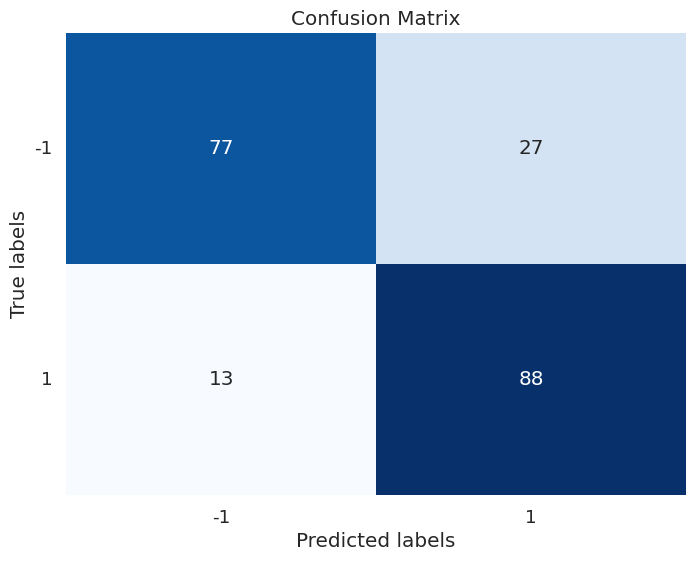

In [67]:
# TODO
conf_matrix = confusion_matrix(y_val, predictions, labels=[-1, 1])
plot_confusion_matrix(conf_matrix, labels=[-1, 1])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [68]:
def recall_score(cm):
  #TODO: return the recall score
  return cm[1][1] / (cm[1][1] + cm[1][0]) if (cm[1][1] + cm[1][0]) > 0 else 0

print(recall_score(conf_matrix))

0.8712871287128713


In [69]:
def precision_score(cm):
  #TODO: return the precision score
    return cm[1][1] / (cm[1][1] + cm[0][1]) if (cm[1][1] + cm[0][1]) > 0 else 0

print(precision_score(conf_matrix))

0.7652173913043478


In [70]:
def f1_score(cm):
  #TODO: return the f1 score
  precision = precision_score(cm)
  recall = recall_score(cm)

  return (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

print(f1_score(conf_matrix))

0.8148148148148149


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [20]:
import numpy as np

class GNB:
    def __init__(self):
        self.class_prior_ = None
        self.class_count_ = None
        self.theta_ = None
        self.sigma_ = None
        self.classes_ = None
        self.n_features = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        self.n_features = X.shape[1]

        self.class_prior_ = np.zeros(n_classes)
        self.class_count_ = np.zeros(n_classes)
        self.theta_ = np.zeros((n_classes, self.n_features))
        self.sigma_ = np.zeros((n_classes, self.n_features))

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.class_prior_[i] = len(X_c) / len(X)
            self.class_count_[i] = len(X_c)
            self.theta_[i] = np.mean(X_c, axis=0)
            self.sigma_[i] = np.var(X_c, axis=0)

    def _gaussian_pdf(self, x, mean, var):
        return - 0.5 * np.log((2 * np.pi * var) * (((x - mean) ** 2) / (var)))

    def predict_proba(self, X):
        n_classes = len(self.classes_)
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, n_classes))

        for i, x in enumerate(X):
          for j in self.classes_:
            probs[i][j] = np.log(self.class_prior_[j])
            for index in range(self.n_features):
              probs[i][j] += self._gaussian_pdf(x[index], self.theta_[j][index], self.sigma_[j][index])
        return probs


In [21]:
class MNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        n_classes = X.shape[0]
        n_features = X.shape[1]
        self.classes, self.class_count = np.unique(y, return_counts=True)
        self.prior = np.zeros(n_classes, dtype = np.float64)
        self.probs = np.zeros((n_classes, n_features), dtype = np.float64)

        for idx, c in enumerate(self.classes):
          X_c = X[c==y]
          self.prior[idx] = X_c.shape[0] / float(X.shape[0])
          X_c = np.sum(X_c, axis = 0)
          sm = np.sum(X_c, dtype = np.float64)
          self.probs[idx] = (X_c+self.alpha)/ (sm + self.alpha*len(self.classes))

    def predict(self, X):
        res = []
        for sample in X:
            posteriors = np.zeros(len(self.classes))
            sub_res = []
            for idx,c in enumerate(self.classes):
                prior = self.prior[idx]
                class_conditional = np.sum((sample*self.probs[idx]))
                posterior = prior + class_conditional
                posteriors[idx] = posterior
                sub_res.append(posteriors[idx])
            res.append(sub_res)
            probs = np.array(res, dtype=float)
        return probs


In [22]:
from sklearn.naive_bayes import MultinomialNB
class MixedDataNB:
    def __init__(self):
        self.gaussian_nb = GNB()
        self.multinomial_nb = MNB()
        self.continuous_indices = None
        self.categorical_indices = None

    def fit(self, X, y):
        unique_counts = np.apply_along_axis(lambda x: len(np.unique(x)), axis=0, arr=X)
        self.continuous_indices = np.where(unique_counts > 25)[0]
        self.categorical_indices = np.where(unique_counts <= 25)[0]

        X_continuous = X[:, self.continuous_indices]
        X_categorical = X[:, self.categorical_indices]

        self.gaussian_nb.fit(X_continuous, y)
        self.multinomial_nb.fit(X_categorical, y)

    def predict(self, X):
        X_continuous = X[:, self.continuous_indices]
        X_categorical = X[:, self.categorical_indices]

        prob_continuous = self.gaussian_nb.predict_proba(X_continuous)
        prob_categorical = self.multinomial_nb.predict(X_categorical)

        prob_total = 9 * prob_categorical + 5 * prob_continuous
        predictions = np.argmax(prob_total, axis=1)
        return predictions


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [23]:
# TODO
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Model training

In [24]:
# TODO
model = MixedDataNB()
X_train[X_train == -1] = 0
y_train[y_train == -1] = 0
model.fit(X_train, y_train)

### Make predictions

In [25]:
# TODO
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [26]:
y_val[y_val == 0] = -1
predictions[predictions == 0] = -1
print(accuracy_score(y_val, predictions))

0.7463414634146341


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

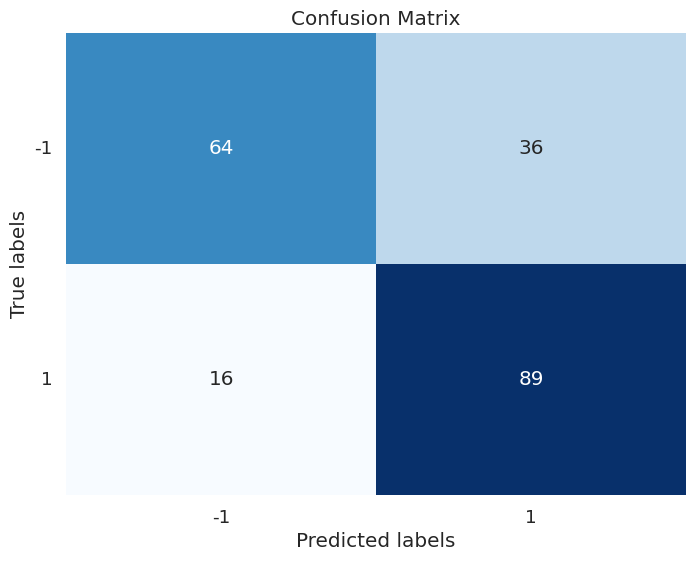

In [27]:
# TODO
cm = confusion_matrix(y_val, predictions, labels=[-1, 1])
plot_confusion_matrix(cm, labels=[-1, 1])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [28]:
print(recall_score(cm))

0.8476190476190476


In [29]:
print(precision_score(cm))

0.712


In [30]:
print(f1_score(cm))

0.773913043478261


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


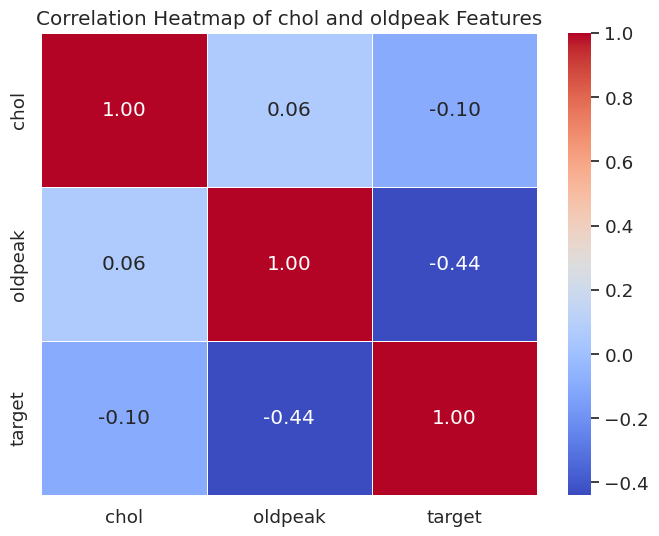

In [31]:
# TODO

corr_matrix = df[['chol', 'oldpeak', 'target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of chol and oldpeak Features')
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part

Remove Chol and test model

In [32]:
# TODO
chol_index = 10
X_train_no_chol = np.delete(X_train, chol_index, axis=1)
X_val_no_chol = np.delete(X_val, chol_index, axis=1)

model = MixedDataNB()
model.fit(X_train_no_chol, y_train)
predictions_no_chol = model.predict(X_val_no_chol)
predictions_no_chol[predictions_no_chol == 0] = -1
print(accuracy_score(y_val, predictions_no_chol))

0.7170731707317073


Remove oldpeak and test model

In [33]:
# TODO
oldpeak_index = 12
X_train_no_oldpeak = np.delete(X_train, oldpeak_index, axis=1)
X_val_no_oldpeak = np.delete(X_val, oldpeak_index, axis=1)

model = MixedDataNB()
model.fit(X_train_no_oldpeak, y_train)
predictions_no_oldpeak = model.predict(X_val_no_oldpeak)
predictions_no_oldpeak[predictions_no_oldpeak == 0] = -1
print(accuracy_score(y_val, predictions_no_oldpeak))

0.6780487804878049


Comparison

**Answer:**
Results show that by removing Chol, the accuracy does not change much. It indicates that Chol feature, doesn't have much impact on the diagnosis of heart disease.

By removing oldpeak, we see that the accuracy decreases noticeably, which shows oldpeak feature's importance in diagnosing heart disease and making predictions.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:
In our implementation, with higher accuracy, f1_score, prcision, and recall, Perceptron holds a better performance in compare to Naive Bayes.

Here are some reasons that might have influenced the result:

**1- Model Assumptions:** Naive Bayes assumes that features are conditionally independent given the class, which may not hold true for all datasets. On the other hand, the perceptron makes no such assumptions about the data.

**2-Feature Distribution:** Naive Bayes assumes specific distributions for features (e.g., Gaussian distribution for continuous features), while the perceptron can handle any type of data without assuming specific distributions.

**3- Model Complexity:** Perceptron is a simpler model compared to Naive Bayes, which may lead to better generalization if the data is not highly complex. However, if the data has complex relationships, Naive Bayes with its probabilistic framework may capture them better.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [34]:
df = pd.read_csv("1.csv")

### Find the distribution


Find the number of samples from each target label.

In [35]:
# TODO
print(df['target'].value_counts())

0    499
1    226
Name: target, dtype: int64


### Split data

In [36]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Train model and make predictions

In [37]:
# TODO
model = MixedDataNB()
X_train[X_train == -1] = 0
y_train[y_train == -1] = 0
X_val[X_val == -1] = 0
model.fit(X_train, y_train)
predictions = model.predict(X_val)
predictions[predictions == 0] = -1
y_val[y_val == 0] = -1

### Plot confusion matrix

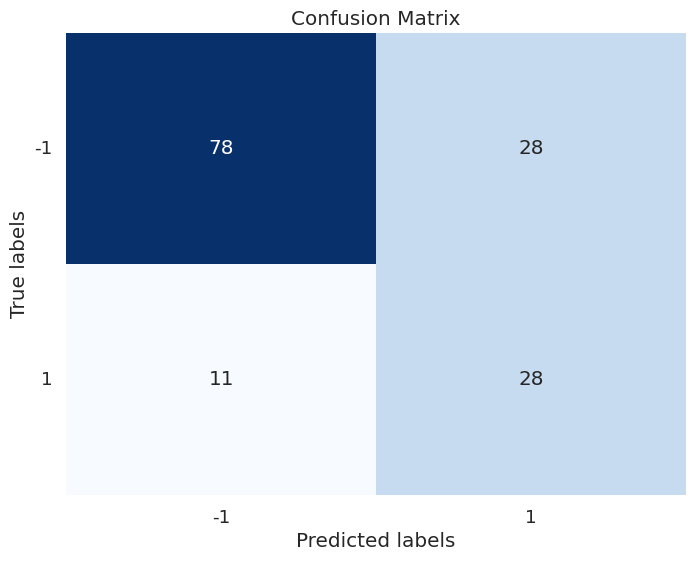

In [38]:
# TODO
cm = confusion_matrix(y_val, predictions, labels=[-1, 1])
plot_confusion_matrix(cm, labels=[-1, 1])

### Calculate metrics

In [39]:
# TODO
print("accuracy: ", accuracy_score(y_val, predictions))
print("f1 score: ", f1_score(cm))
print("precision score: ", precision_score(cm))
print("recall score: ", recall_score(cm))

accuracy:  0.7310344827586207
f1 score:  0.5894736842105263
precision score:  0.5
recall score:  0.717948717948718


## Second dataset

### Load data

In [40]:
df = pd.read_csv("2.csv")

### Find the distribution


Find the number of samples from each target label.

In [41]:
# TODO
print(df['target'].value_counts())

0    499
1    126
Name: target, dtype: int64


### Split data

In [42]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y)

### Train model and make predictions

In [43]:
# TODO
model = MixedDataNB()
X_train[X_train == -1] = 0
y_train[y_train == -1] = 0
X_val[X_val == -1] = 0
model.fit(X_train, y_train)
predictions = model.predict(X_val)
predictions[predictions == 0] = -1
y_val[y_val == 0] = -1

### Plot confusion matrix

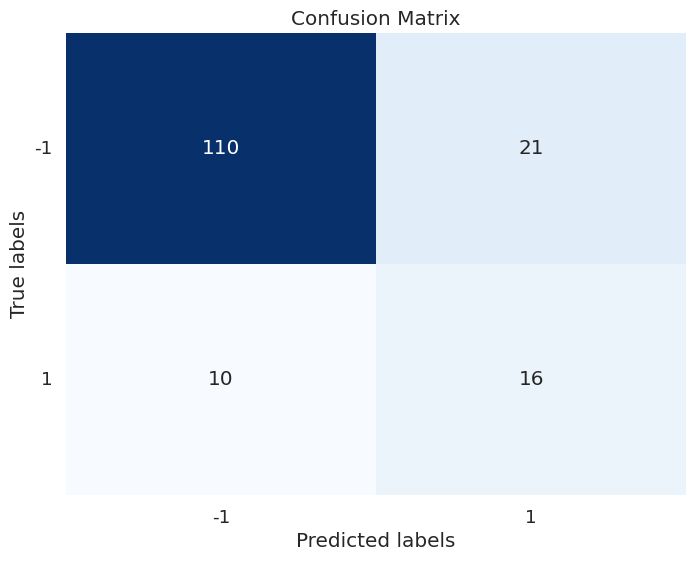

In [44]:
# TODO
cm = confusion_matrix(y_val, predictions, labels=[-1, 1])
plot_confusion_matrix(cm, labels=[-1, 1])

### Calculate metrics

In [45]:
# TODO
print("accuracy: ", accuracy_score(y_val, predictions))
print("f1 score: ", f1_score(cm))
print("precision score: ", precision_score(cm))
print("recall score: ", recall_score(cm))

accuracy:  0.802547770700637
f1 score:  0.5079365079365079
precision score:  0.43243243243243246
recall score:  0.6153846153846154


## Third dataset

### Load data

In [46]:
df = pd.read_csv("3.csv")

### Find the distribution


Find the number of samples from each target label.

In [47]:
# TODO
print(df['target'].value_counts())

0    499
1     26
Name: target, dtype: int64


### Split data

In [48]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y)

### Train model and make predictions

In [49]:
# TODO
model = MixedDataNB()
X_train[X_train == -1] = 0
y_train[y_train == -1] = 0
model.fit(X_train, y_train)
predictions = model.predict(X_val)
y_val[y_val == 0] = -1
predictions[predictions == 0] = -1
print(accuracy_score(y_val, predictions))

0.9318181818181818


### Plot confusion matrix

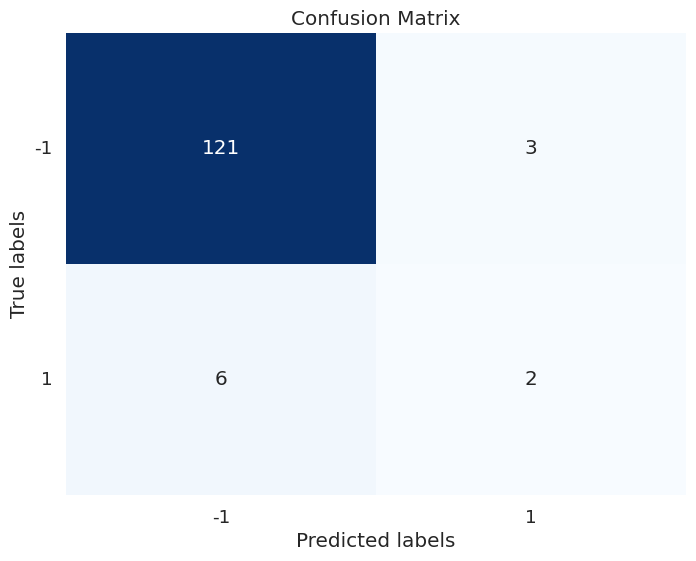

In [50]:
# TODO
cm = confusion_matrix(y_val, predictions, labels=[-1, 1])
plot_confusion_matrix(cm, labels=[-1, 1])

### Calculate metrics

In [51]:
print("accuracy: ", accuracy_score(y_val, predictions))
print("f1 score: ", f1_score(cm))
print("precision score: ", precision_score(cm))
print("recall score: ", recall_score(cm))

accuracy:  0.9318181818181818
f1 score:  0.3076923076923077
precision score:  0.4
recall score:  0.25


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**
We can observe that as our dataset gets more imbalanced, the accuracy increases suspiciously, and the f1 score decreases.

The decrease in the f1 score is a logical and expected result because our trained data gets more biased. So, the model's predictions are expected to fail more. (As it gets trained on weaker dataset.)

However, the increase in accuracy score might be misleading. By imbalancing our dataset we do not expect our model to predict better. However, if we choose accuracy score for evaluating, it will lead us to misleading conclusions.

The reason behind the accuracy score increase is because accuracy doesn't take the difference between number of training samples from each class in account.

In a hypothetical scenario, imagine the model predicts all samples to be from a certain class. While using imbalanced data, the accuracy will be quite high in this case. Obviously, the high accuracy is a result of using imbalanced data and **not our model**. That is why f1 score is a more reasonable measure to use while having imbalanced dataset.